In [ ]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

from lightsout.stochastic.kernel import make_exp_kernel
from lightsout.stochastic.viz import get_entropy, get_stochastic_probs

MY_WIDTH = 5.87 * 1.5  # in inches
ratio = 4 / 3
MY_HEIGHT = MY_WIDTH / ratio

# Visualization settings
n = 5
alpha_values = [0.1, 0.4, 0.8]
lambda_values = [0.0001, 1.0, 5.0]

custom_red = mcolors.LinearSegmentedColormap.from_list(
    "custom_red", ["white", "#E3000B"], N=256
)


def plot_board(
    pressed_cells: list[tuple[int, int]],
    show_effects: bool = False,
    show_probs: bool = True,
    alpha: float = 0.8,
    lambda_: float = 1.0,
    save_path: str | None = None,
):
    """Create board visualization with optional stochastic effects."""
    fig, ax = plt.subplots(figsize=(8, 8))

    flip_probs = None
    if show_effects:
        kernel = make_exp_kernel(n, alpha, lambda_)
        actions = [row * n + col for row, col in pressed_cells]
        flip_probs = get_stochastic_probs(kernel, actions, n)

    for i in range(n):
        for j in range(n):
            if flip_probs is not None:
                prob = flip_probs[i, j]
                if prob == 0:
                    color = "white"
                else:
                    white = np.array([1.0, 1.0, 1.0])
                    red = np.array([227 / 255, 0, 11 / 255])
                    color = white + prob * (red - white)
            else:
                is_pressed = (i, j) in pressed_cells
                color = "#E3000B" if is_pressed else "white"

            rect = Rectangle(
                (j, n - 1 - i),
                1,
                1,
                facecolor=color,
                edgecolor="#FFD700" if ((i, j) in pressed_cells) else "black",
                linewidth=2,
                zorder=5 if ((i, j) in pressed_cells) else 1,
            )
            ax.add_patch(rect)

            if flip_probs is not None and flip_probs[i, j] > 0 and show_probs:
                text_color = "white" if flip_probs[i, j] > 0.5 else "black"
                ax.text(
                    j + 0.5,
                    n - i - 0.5,
                    f"{flip_probs[i, j]:.2f}",
                    ha="center",
                    va="center",
                    fontsize=10,
                    color=text_color,
                    fontweight="bold",
                    zorder=10,
                )

    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_aspect("equal")
    ax.axis("off")
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight", facecolor="white")
        print(f"Saved: {save_path}")
    plt.show()
    plt.close()


def plot_heatmaps(
    pressed_cells: list[tuple[int, int]],
    plot_type: str = "probs",
    title_prefix: str = "Flip probabilities",
    save_prefix: str = "flip_probs",
):
    """Create heatmap visualization across alpha and lambda values."""
    pressed_actions = [r * n + c for r, c in pressed_cells]

    settings = (
        dict(cmap=custom_red, vmin=0.0, vmax=1.0)
        if plot_type == "probs"
        else dict(cmap="magma", vmin=0.0, vmax=1.0)
    )
    cbar_label = "Pr(flip)" if plot_type == "probs" else "Entropy"

    for lam in lambda_values:
        fig, axes = plt.subplots(
            nrows=1,
            ncols=len(alpha_values),
            figsize=(MY_WIDTH, MY_WIDTH * 0.38),
            constrained_layout=True,
        )
        axes = np.asarray(axes)

        for j, a in enumerate(alpha_values):
            ax = axes[j]
            kernel = make_exp_kernel(n=n, alpha=a, lam=lam)
            probs = get_stochastic_probs(kernel, pressed_actions, n)

            data = get_entropy(probs) if plot_type == "entropy" else probs
            im = ax.imshow(data, **settings)

            for r, c in pressed_cells:
                ax.add_patch(
                    Rectangle(
                        (c - 0.5, r - 0.5),
                        1,
                        1,
                        edgecolor="#FFD700",
                        facecolor="none",
                        linewidth=2,
                        zorder=5,
                    )
                )

            ax.set_title(rf"$\alpha={a}$", fontsize=11)
            ax.set_xticks(range(n))
            ax.set_yticks(range(n))
            ax.set_xticks(np.arange(-0.5, n, 1), minor=True)
            ax.set_yticks(np.arange(-0.5, n, 1), minor=True)
            ax.grid(which="minor", color="black", linewidth=0.5)
            ax.tick_params(which="both", bottom=False, left=False)

        fig.suptitle(
            rf"{title_prefix}, $\lambda={lam}$", fontsize=12, fontweight="bold"
        )
        plt.colorbar(
            im, ax=axes, label=cbar_label, orientation="vertical", shrink=0.8
        )
        plt.savefig(
            f"../results/presentation/plots/{save_prefix}_lambda_{lam}.svg",
            dpi=300,
            bbox_inches="tight",
        )
        plt.show()

Saved: ../results/presentation/plots/board_center_pressed.svg


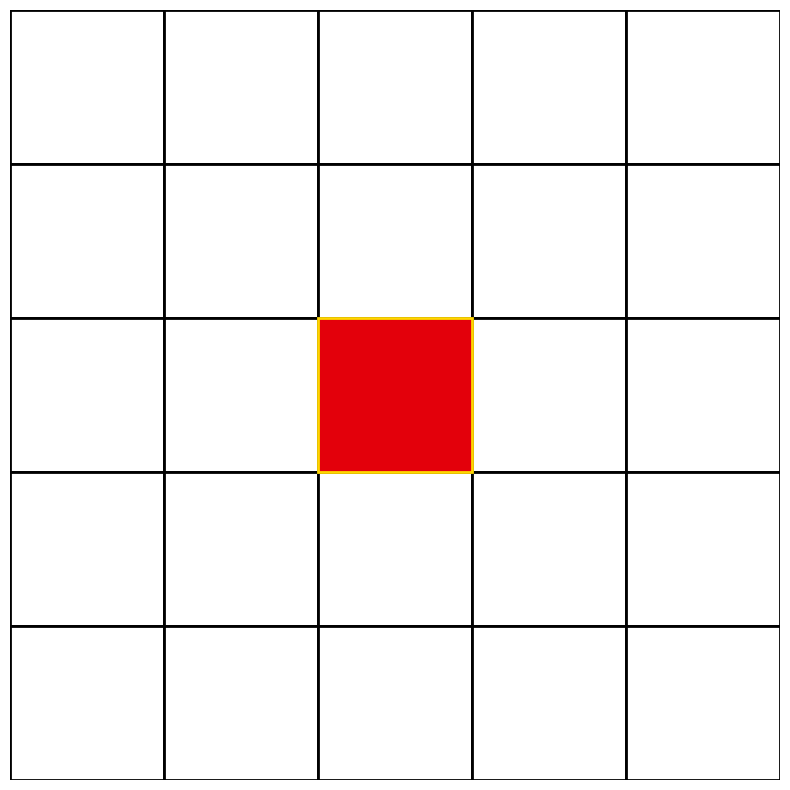

Saved: ../results/presentation/plots/board_center_effects_deterministic.svg


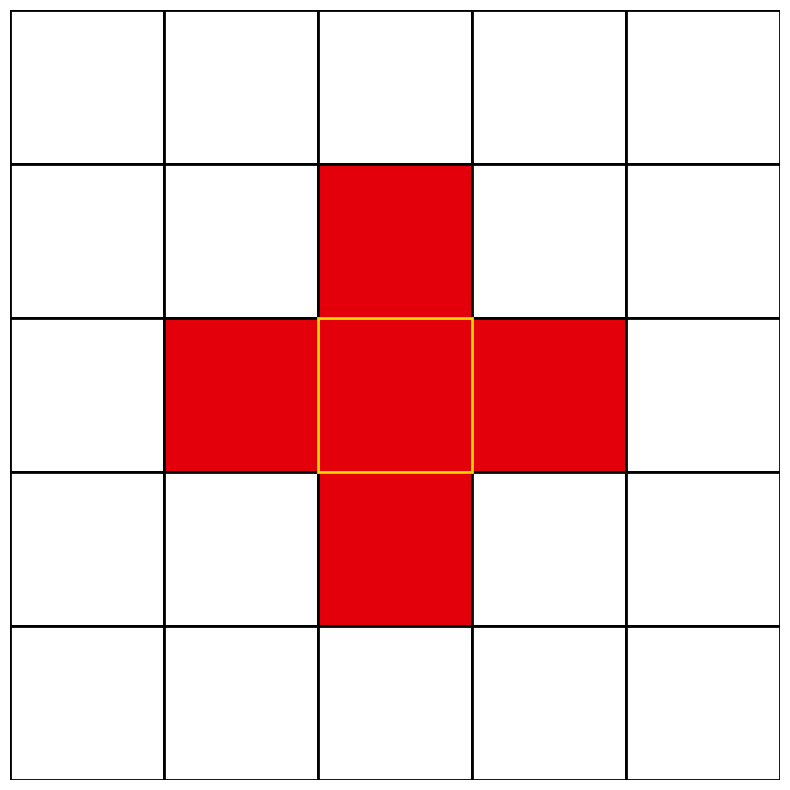

Saved: ../results/presentation/plots/board_center_effects.svg


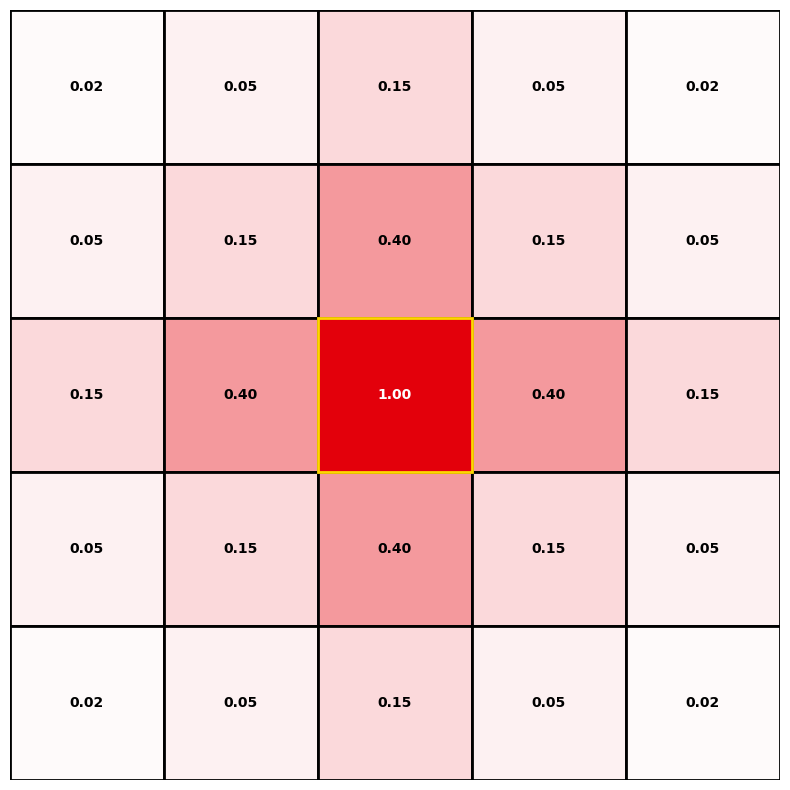

Saved: ../results/presentation/plots/board_multi_pressed.svg


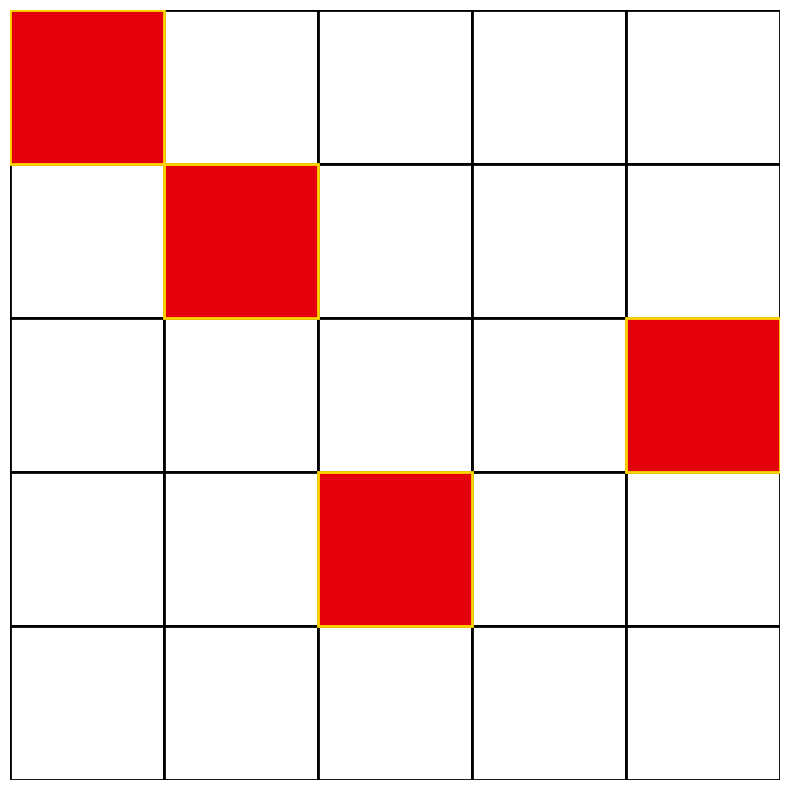

Saved: ../results/presentation/plots/board_multi_effects_deterministic.svg


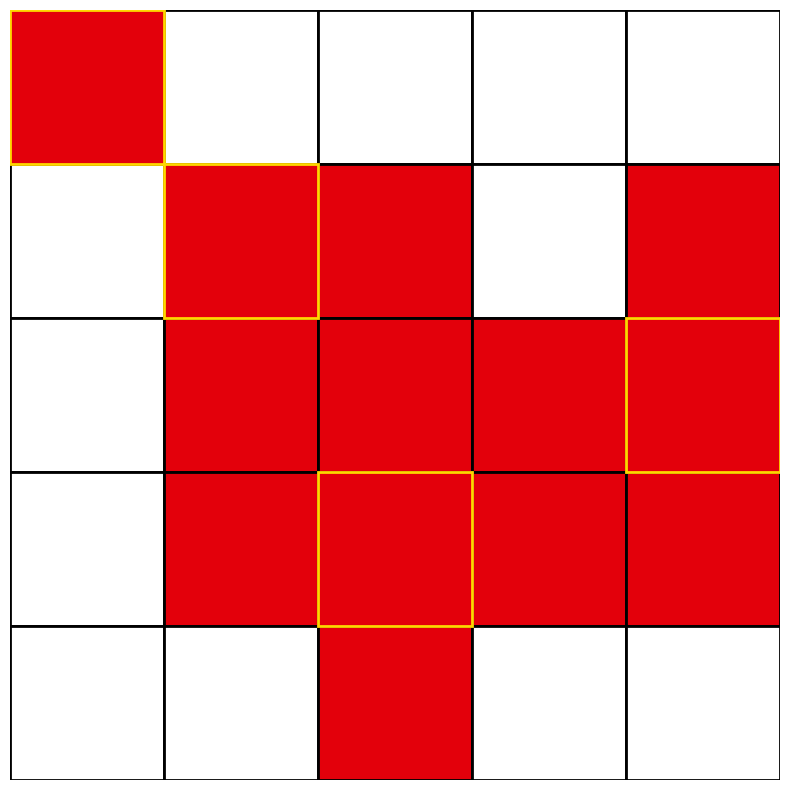

Saved: ../results/presentation/plots/board_multi_effects.svg


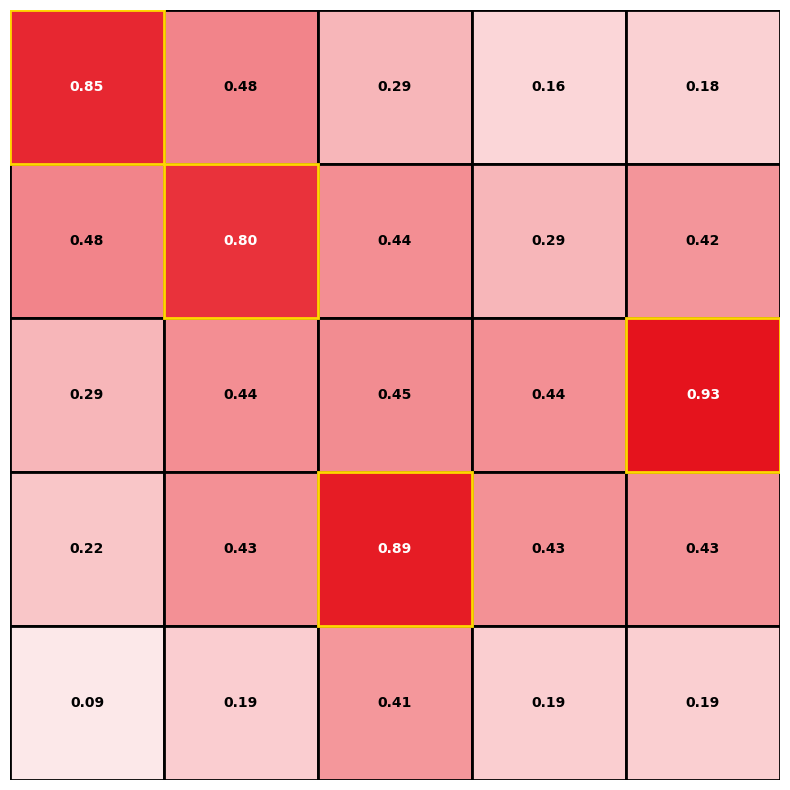

In [58]:
# Single press
plot_board(
    [(2, 2)],
    show_effects=False,
    save_path="../results/presentation/plots/board_center_pressed.svg",
)

plot_board(
    [(2, 2)],
    show_effects=True,
    show_probs=False,
    alpha=1.0,
    lambda_=0.0001,
    save_path="../results/presentation/plots/board_center_effects_deterministic.svg",
)

plot_board(
    [(2, 2)],
    show_effects=True,
    show_probs=True,
    alpha=0.4,
    lambda_=1.0,
    save_path="../results/presentation/plots/board_center_effects.svg",
)

# Multi press
multi_presses = [(0, 0), (1, 1), (2, 4), (3, 2)]

plot_board(
    multi_presses,
    show_effects=False,
    save_path="../results/presentation/plots/board_multi_pressed.svg",
)

plot_board(
    multi_presses,
    show_effects=True,
    show_probs=False,
    alpha=1.0,
    lambda_=0.0001,
    save_path="../results/presentation/plots/board_multi_effects_deterministic.svg",
)

plot_board(
    multi_presses,
    show_effects=True,
    show_probs=True,
    alpha=0.4,
    lambda_=1.0,
    save_path="../results/presentation/plots/board_multi_effects.svg",
)

## Flip Probability Visualizations

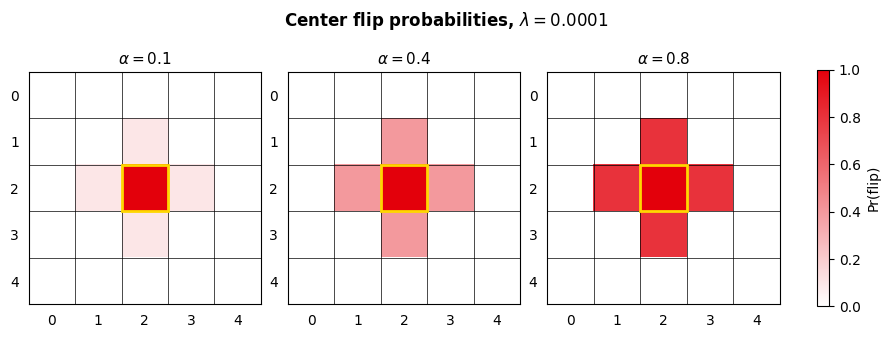

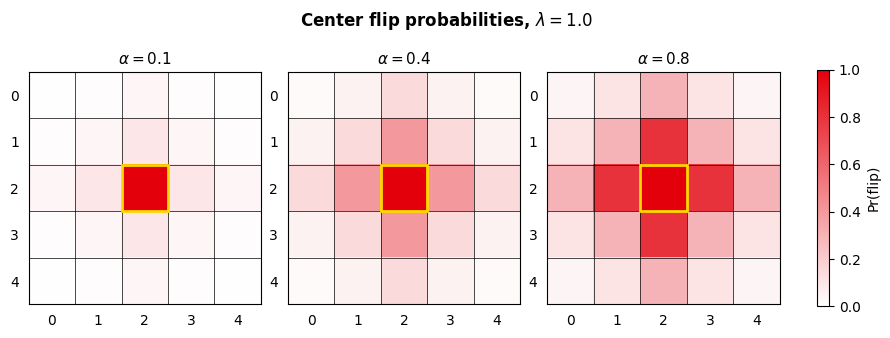

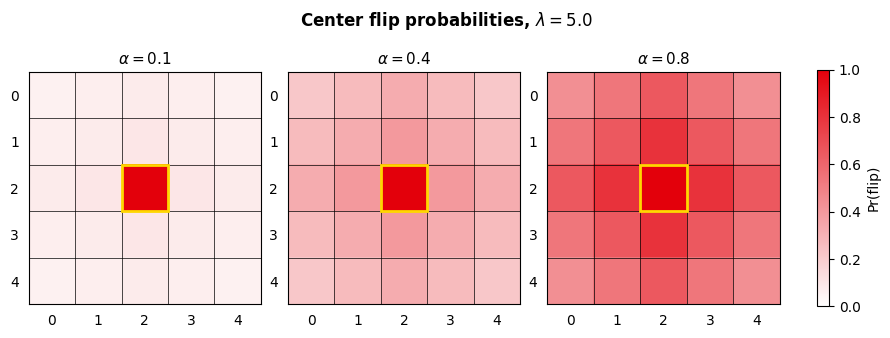

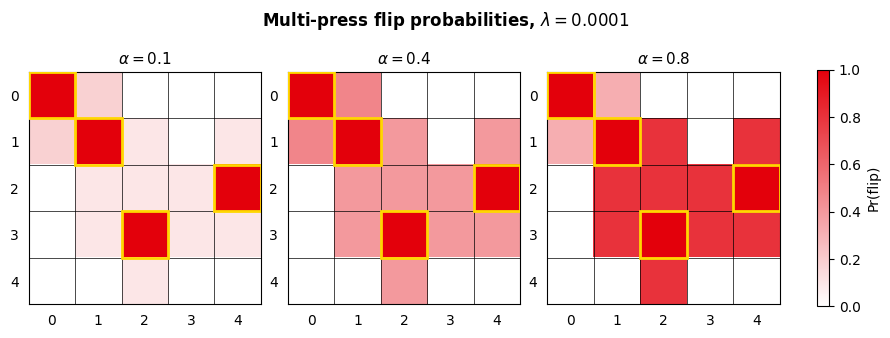

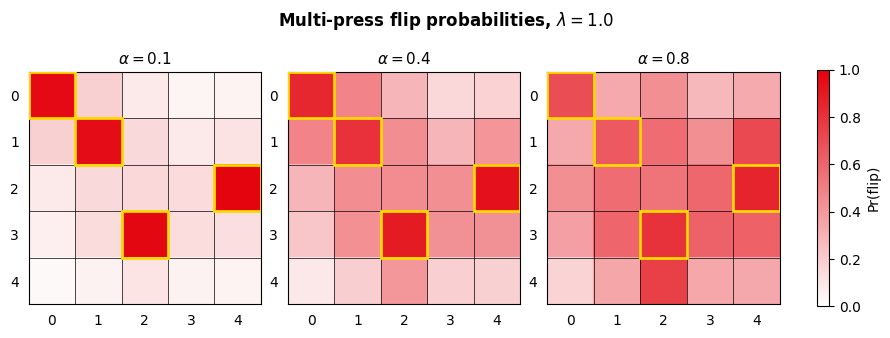

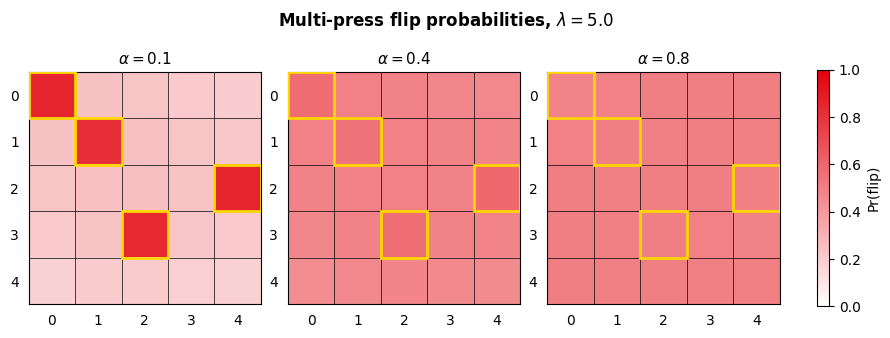

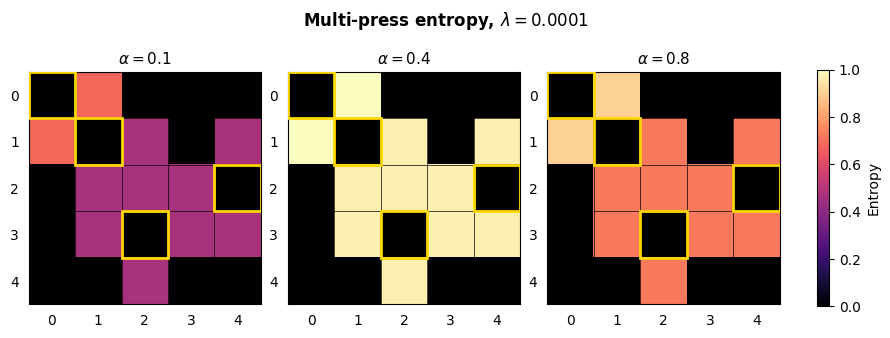

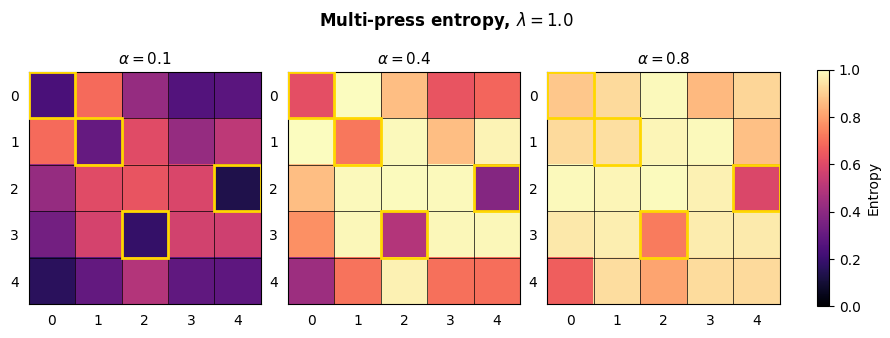

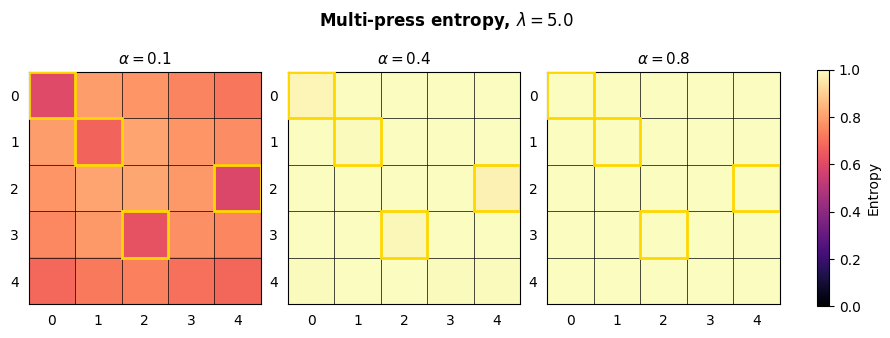

In [ ]:
plot_heatmaps(
    [(2, 2)], "probs", "Center flip probabilities", "flip_probs/center"
)
plot_heatmaps(
    multi_presses,
    "probs",
    "Multi-press flip probabilities",
    "flip_probs/multi",
)
plot_heatmaps(
    multi_presses,
    "entropy",
    "Multi-press entropy",
    "flip_probs/entropy",
)